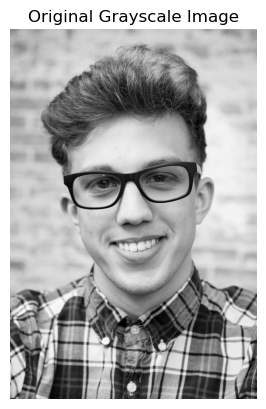

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
img = Image.open('Test.jpg').convert('L')  # 'L' mode = grayscale
X = np.array(img)

# Display the image
plt.imshow(X, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [9]:
print(X.shape)

(3600, 2403)


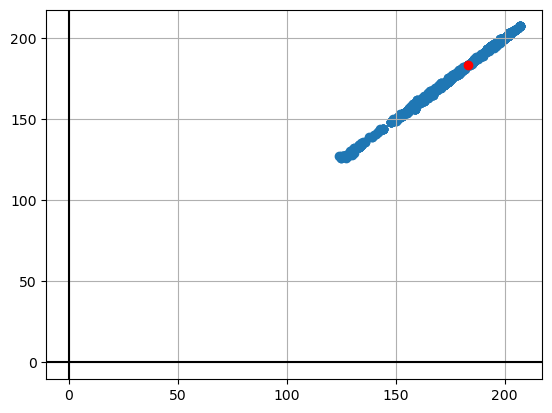

In [11]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

x_mean=X.mean(axis=1)
plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.show()

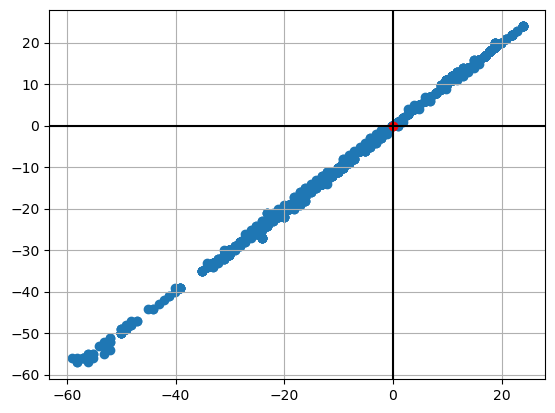

In [13]:
d,n = X.shape
def center(X):
    return X - X.mean(axis=1).reshape(-1,1)
X_centered = center(X)
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')
c_mean = X_centered.mean(axis=1)
plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.show()

In [15]:
def covariance(X):
    return X @ X.T/n
C=covariance(X_centered)
print(C.shape)

(3600, 3600)


In [17]:
def compute_pc(C):
    d=C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1,w_2 = eigvec[:,-1] , eigvec[:,-2]
    return w_1,w_2
w_1,w_2 = compute_pc(C)
w_1=w_1.reshape(w_1.shape[0],1)
w_2=w_2.reshape(w_2.shape[0],1)
print(w_1)
print(w_2)

[[-0.0058491 ]
 [-0.00588749]
 [-0.0059485 ]
 ...
 [ 0.00314894]
 [ 0.00339265]
 [ 0.00351678]]
[[-0.00033781]
 [-0.00032966]
 [-0.00035333]
 ...
 [ 0.02371758]
 [ 0.02362529]
 [ 0.0236451 ]]


In [121]:
def compute_pcs_with_variance_threshold(C, threshold):
    # Compute all eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(C)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    
    # Compute explained variance ratio
    explained_variance = eigvals / np.sum(eigvals)
    cumulative_variance = np.cumsum(explained_variance)
    
    # Find k where cumulative variance >= threshold
    k = np.argmax(cumulative_variance >= threshold) + 1
    
    # Select top k eigenvectors
    top_k_components = eigvecs[:, :k]
    
    return top_k_components, explained_variance, cumulative_variance, k

# Call the function with your covariance matrix
top_k_components, explained_variance, cumulative_variance, k = compute_pcs_with_variance_threshold(C, threshold=0.96)

print(f"Number of components selected: {k}")
print(f"Cumulative explained variance with {k} components: {cumulative_variance[k-1]}")


Number of components selected: 51
Cumulative explained variance with 51 components: 0.9603106530655113


(3600, 51)
(3600, 2403)


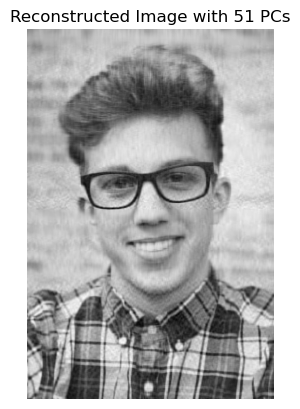

In [ ]:
# Projecting the centered data onto the top k principal components
print(top_k_components.shape)
print(X_centered.shape)
X_pca = top_k_components.T @ X_centered

X_reconstructed = top_k_components @ X_pca + X.mean(axis=1).reshape(-1, 1)

plt.imshow(X_reconstructed, cmap='gray')
plt.title(f"Reconstructed Image with {k} PCs")
plt.axis('off')
plt.show()


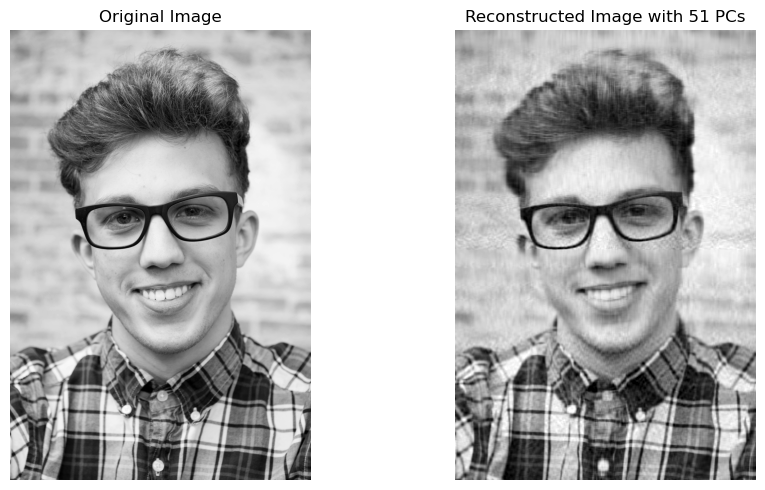

In [125]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_reconstructed, cmap='gray', vmin=0, vmax=255)
plt.title(f"Reconstructed Image with {k} PCs")
plt.axis('off')

plt.tight_layout()
plt.show()